In [1]:
from features3D.ImportanceSelect import ImportanceSelect
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,StratifiedKFold,StratifiedShuffleSplit
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
def class_counter(y):
    
    from collections import Counter
    
    c_total = len(y)
    c = Counter(y)
    c_porcent = [(int(x)/float(c_total))*100 for x in c.values()]
    return c_porcent

In [2]:
DF1 = pd.read_csv('HDBSCAN_H_labeled_F1.csv',index_col=0, delimiter=",")
pdb_names = DF1.index
f_names = DF1.columns

In [3]:
X = DF1.drop(['class'],axis=1).values
y = DF1["class"].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=123,
                                                    stratify=y)

In [92]:
# Selección de caracteristicas con RF, estandarización y entrenamiento de modelo k-NN

# 1) Feature selection
rf = RandomForestClassifier(n_estimators=200,n_jobs=-1,class_weight="balanced",criterion="entropy",random_state=10)
#feature_importance = SelectFromModel(rf, threshold="mean")
feature_importance = ImportanceSelect(model=rf)

# 2) Aplicar estandarización de los datos
scale = StandardScaler()
#scale = MinMaxScaler()

# 3) Clasificador knn
knn = KNeighborsClassifier(weights="distance",n_jobs=-1)

# 4) Crear pipeline
pipeline = make_pipeline(feature_importance, scale ,knn)

# 5) hiperparametros a ajustar
param_grid = {"kneighborsclassifier__p":[1,2],"kneighborsclassifier__n_neighbors":[1,2,4,8,10,15,21],"importanceselect__n":[1,2,3,4,5,6,7,8,9,10]}


clf = GridSearchCV(pipeline,param_grid, verbose=5,scoring="accuracy",
                   cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=10),n_jobs=-1)
clf.fit(X_train, y_train)

# 6. Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)


Fitting 10 folds for each of 140 candidates, totalling 1400 fits
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.535714, total=   1.2s
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.481481, total=   1.1s
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.517241, total=   1.3s
[CV]  importan

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.3s


[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.481481, total=   1.2s
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.535714, total=   1.3s
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.500000, total=   1.2s
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.653846, total=   1.0s
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2 
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2 
[CV]  importanceselect__n=1, kneighborsclassifie

[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1, score=0.600000, total=   1.2s
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.413793, total=   1.1s
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2 
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.500000, total=   1.1s
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.555556, total=   1.1s
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.461538, total=   1.1s
[CV] importancese

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   22.9s


[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1, score=0.653846, total=   1.1s
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1, score=0.576923, total=   1.2s
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1, score=0.692308, total=   1.1s
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1, score=0.576923, total=   1.1s
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1, score=0.560000, total=   1.1s
[CV] importancese

[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1, score=0.518519, total=   1.0s
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1, score=0.500000, total=   1.2s
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1, score=0.653846, total=   1.1s
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1, score=0.615385, total=   1.2s
[CV] importanceselect__n=1, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1 
[CV]  importanceselect__n=1, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1, score=0.730769, total=   1.1s
[CV] imp

[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.586207, total=   1.2s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.642857, total=   1.1s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.592593, total=   1.1s
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.586207, total=   1.2s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.769231, total=   1.3s
[CV]  importances

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   55.3s


[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.653846, total=   1.7s
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.769231, total=   1.7s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.760000, total=   1.5s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.720000, total=   1.7s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1, score=0.586207, total=   1.7s
[CV] importancese

[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.653846, total=   1.1s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.800000, total=   1.0s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.692308, total=   1.1s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.576923, total=   1.1s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=2, kneighborsclassifie

[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2, score=0.678571, total=   1.1s
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2, score=0.653846, total=   1.0s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2 
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2, score=0.615385, total=   1.1s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2, score=0.653846, total=   1.1s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1 
[CV]  importanceselect__n=2, kneighbors

[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2, score=0.620690, total=   1.0s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2, score=0.678571, total=   1.0s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2, score=0.653846, total=   1.0s
[CV] importanceselect__n=2, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2 
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2, score=0.629630, total=   1.1s
[CV]  importanceselect__n=2, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2, score=0.692308, total=   1.0s
[CV] imp

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.6min


[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.689655, total=   1.2s
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.724138, total=   1.2s
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.785714, total=   1.1s
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.555556, total=   1.1s
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.730769, total=   1.1s
[CV] importancese

[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.720000, total=   1.1s
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1, score=0.689655, total=   1.2s
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1, score=0.758621, total=   1.2s
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1, score=0.740741, total=   1.1s
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=3, kneighborsclassifie

[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.840000, total=   1.1s
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1 
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.730769, total=   1.2s
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.640000, total=   1.1s
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1 
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1 
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1, score=0.655172, total=   1.3s
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1, score=0.724138, total=   1.3s
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1 
[CV] import

[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2, score=0.807692, total=   1.5s
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2 
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2, score=0.730769, total=   1.7s
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1 
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2, score=0.846154, total=   1.9s
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2, score=0.840000, total=   1.8s
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1 
[CV]  importanceselect__n=3, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2, score=0.640000, total=   1.6s
[CV] importanceselect__n=3, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1 
[CV] imp

[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.785714, total=   1.2s
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.961538, total=   1.1s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.769231, total=   1.0s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.846154, total=   0.9s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.840000, total=   0.9s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV]  importances

[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min


[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1, score=0.629630, total=   0.9s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1, score=0.961538, total=   0.9s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1, score=0.846154, total=   0.9s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.884615, total=   0.7s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1, score=0.846154, total=   1.0s
[CV] importancese

[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1, score=0.758621, total=   0.9s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1, score=0.714286, total=   0.9s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1, score=0.777778, total=   0.8s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1, score=0.961538, total=   1.0s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifie

[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2, score=0.800000, total=   1.1s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1, score=0.793103, total=   1.1s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1, score=0.793103, total=   1.1s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1, score=0.678571, total=   1.0s
[CV] importanceselect__n=4, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighbors

[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2, score=0.807692, total=   1.1s
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2, score=0.846154, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=4, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2, score=0.760000, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.857143, total=   1.0s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=5, kneighborsclassi

[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.923077, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.807692, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.923077, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.800000, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.840000, total=   1.1s
[CV] importancese

[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2 
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.961538, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.923077, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.846154, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.884615, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifie

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.6min


[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1, score=0.793103, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1, score=0.827586, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1, score=0.750000, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1, score=0.851852, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1, score=1.000000, total=   1.1s
[CV]  im

[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2, score=0.760000, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2, score=0.800000, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1, score=0.724138, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1, score=0.827586, total=   1.1s
[CV] importanceselect__n=5, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1 
[CV]  importanceselect__n=5, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1, score=0.678571, total=   1.1s
[CV] imp

[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.884615, total=   1.1s
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.923077, total=   1.1s
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.800000, total=   1.1s
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.800000, total=   1.1s
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1, score=0.862069, total=   1.1s
[CV] importancese

[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2 
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.923077, total=   1.1s
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2 
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.846154, total=   1.1s
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.884615, total=   1.1s
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.800000, total=   1.1s
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=6, kneighborsclassifie

[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2 
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2, score=0.678571, total=   1.1s
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2 
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2, score=0.884615, total=   1.1s
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2, score=0.961538, total=   1.1s
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2 
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2 
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2, score=0.884615, total=   1.0s
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1 
[CV]  importanceselect__n=6, kneighbors

[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2 
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2, score=0.724138, total=   1.1s
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2 
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2, score=0.678571, total=   1.1s
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2 
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2, score=0.851852, total=   1.1s
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2 
[CV]  importanceselect__n=6, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2, score=0.884615, total=   1.1s
[CV] importanceselect__n=6, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2 
[CV]  importanceselect__n=6, kneighbors

[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1, score=0.960000, total=   1.1s
[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2 
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.896552, total=   1.1s
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.931034, total=   1.1s
[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2 
[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2 
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.785714, total=   1.2s
[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2 
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.851852, total=   1.2s
[CV] importancese

[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  4.9min


[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.923077, total=   1.1s
[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.884615, total=   1.1s
[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.880000, total=   1.1s
[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.760000, total=   1.1s
[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1, score=0.862069, total=   1.1s
[CV] importancese

[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2 
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.961538, total=   1.8s
[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2 
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.846154, total=   1.1s
[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1 
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.760000, total=   1.1s
[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1 
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.840000, total=   1.1s
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.807692, total=   1.2s
[CV] importance

[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2 
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2, score=0.851852, total=   1.1s
[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2 
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2, score=0.961538, total=   1.1s
[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2 
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2, score=0.807692, total=   1.0s
[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2 
[CV]  importanceselect__n=7, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2, score=0.884615, total=   1.0s
[CV] importanceselect__n=7, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1 
[CV]  importanceselect__n=7, kneighbors

[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2 
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.896552, total=   1.1s
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2 
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.857143, total=   1.1s
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2 
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=0.851852, total=   1.1s
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2, score=1.000000, total=   1.1s
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2 
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=2 
[CV]  importanceselect__n=8, kneighborsclassifie

[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1, score=0.840000, total=   1.2s
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2 
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.862069, total=   1.1s
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.862069, total=   1.1s
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2 
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2 
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.888889, total=   1.2s
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2 
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=2, score=0.857143, total=   1.3s
[CV] importancese

[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2 
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1, score=0.920000, total=   1.1s
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2 
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1, score=0.800000, total=   1.2s
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2 
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2, score=0.827586, total=   1.1s
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2, score=0.862069, total=   1.1s
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2 
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=2 
[CV]  importanceselect__n=8, kneighbors

[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1 
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1, score=0.884615, total=   1.1s
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2 
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1, score=0.807692, total=   1.1s
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2 
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1, score=0.920000, total=   1.0s
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2 
[CV]  importanceselect__n=8, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1, score=0.800000, total=   1.1s
[CV] importanceselect__n=8, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2 
[CV]  importanceselect__n=8, kneighbors

[CV] importanceselect__n=9, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 


[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  6.4min


[CV]  importanceselect__n=9, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1, score=1.000000, total=   1.1s
[CV] importanceselect__n=9, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV]  importanceselect__n=9, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1, score=0.923077, total=   1.1s
[CV] importanceselect__n=9, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1 
[CV]  importanceselect__n=9, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1, score=0.884615, total=   1.1s
[CV] importanceselect__n=9, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2 
[CV]  importanceselect__n=9, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1, score=1.000000, total=   1.1s
[CV] importanceselect__n=9, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2 
[CV]  importanceselect__n=9, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=1, score=0.840000, total=   1.1s
[CV] importancese

[CV] importanceselect__n=9, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=9, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1, score=0.892857, total=   1.2s
[CV] importanceselect__n=9, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=9, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1, score=1.000000, total=   1.1s
[CV] importanceselect__n=9, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=9, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1, score=0.884615, total=   1.1s
[CV] importanceselect__n=9, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1 
[CV]  importanceselect__n=9, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=1, score=0.884615, total=   1.1s
[CV] importanceselect__n=9, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2 
[CV]  importanceselect__n=9, kneighborsclassifie

[CV] importanceselect__n=9, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1 
[CV]  importanceselect__n=9, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1, score=0.827586, total=   1.1s
[CV] importanceselect__n=9, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1 
[CV]  importanceselect__n=9, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1, score=0.857143, total=   1.1s
[CV] importanceselect__n=9, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1 
[CV]  importanceselect__n=9, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1, score=0.962963, total=   1.1s
[CV] importanceselect__n=9, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1 
[CV]  importanceselect__n=9, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1, score=1.000000, total=   1.2s
[CV]  importanceselect__n=9, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=1, score=0.884615, total=   1.2s
[CV] imp

[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=9, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=2, score=1.000000, total=   1.2s
[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.896552, total=   1.1s
[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=0.857143, total=   1.1s
[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1, score=1.000000, total=   1.2s
[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__p=1 
[CV]  importanceselect__n=10, kneighbor

[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=1.000000, total=   1.1s
[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.880000, total=   1.1s
[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=2, kneighborsclassifier__p=2, score=0.960000, total=   1.1s
[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1, score=1.000000, total=   1.1s
[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=4, kneighborsclassifier__p=1 
[CV]  importanceselect__n=10, kneighbor

[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2 
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.961538, total=   1.1s
[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2 
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.884615, total=   1.1s
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.884615, total=   1.1s
[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1 
[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=10, kneighborsclassifier__p=1 
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.960000, total=   1.0s
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=8, kneighborsclassifier__p=2, score=0.880000, total=   1.1s
[CV] i

[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2 
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2, score=0.925926, total=   1.1s
[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2 
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2, score=1.000000, total=   1.1s
[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2 
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2, score=0.884615, total=   1.0s
[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2 
[CV]  importanceselect__n=10, kneighborsclassifier__n_neighbors=15, kneighborsclassifier__p=2, score=0.884615, total=   1.5s
[CV] importanceselect__n=10, kneighborsclassifier__n_neighbors=21, kneighborsclassifier__p=1 
[CV]  importanceselect__n=10, 

[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed:  7.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
       error_score='raise',
       estimator=Pipeline(steps=[('importanceselect', ImportanceSelect(model=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
   ...ski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance'))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'kneighborsclassifier__p': [1, 2], 'kneighborsclassifier__n_neighbors': [1, 2, 4, 8, 10, 15, 21], 'importanceselect__n': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=5)

In [95]:
# 9. Evaluate model pipeline on test data
pred = clf.predict(X_test)
print(metrics.classification_report(y_test,pred))
print(metrics.confusion_matrix(y_test,pred))

# 10. Save model for future use
joblib.dump(clf, 'knn_model_H1.pkl')
# To load: clf2 = joblib.load('rf_regressor.pkl')

             precision    recall  f1-score   support

        0.0       1.00      0.50      0.67         2
        1.0       1.00      0.50      0.67         6
        2.0       1.00      1.00      1.00         3
        3.0       0.75      1.00      0.86         3
        4.0       1.00      1.00      1.00         3
        5.0       0.93      1.00      0.96        39
        6.0       0.91      0.91      0.91        11

avg / total       0.93      0.93      0.92        67

[[ 1  0  0  0  0  0  1]
 [ 0  3  0  0  0  3  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0 39  0]
 [ 0  0  0  1  0  0 10]]


['knn_model_H1.pkl']

In [108]:
pipe_fs = clf.best_estimator_.named_steps["importanceselect"]
indices = pipe_fs.model.feature_importances_.argsort()[::-1]


/home/Vilion/miniconda3/envs/bio/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


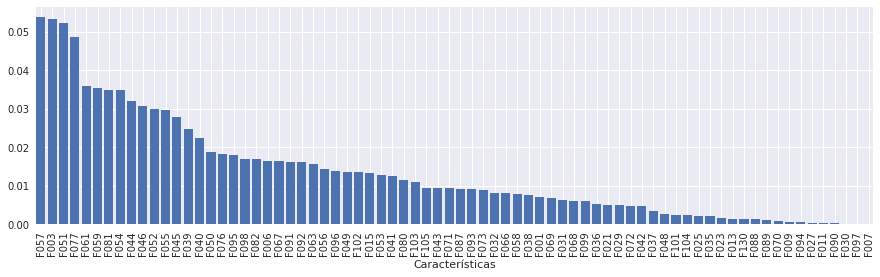

In [123]:
%matplotlib inline


plt.figure(figsize=(15,4))
plt.bar(np.arange(X_train.shape[1]), pipe_fs.model.feature_importances_[indices])
plt.xticks(range(len(f_names[:-1])),f_names[:-1][indices],rotation = "vertical")
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel(u"Características")

plt.savefig("RF-fs-H",dpi=300,bbox_inches="tight")

In [8]:
clf2 = joblib.load('knn_model_H1.pkl')

In [11]:
clf2.best_params_

{'importanceselect__n': 10,
 'kneighborsclassifier__n_neighbors': 4,
 'kneighborsclassifier__p': 1}

In [9]:
pred = clf2.predict(X_test)
print(metrics.classification_report(y_test,pred))
print(metrics.confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

        0.0       1.00      0.50      0.67         2
        1.0       1.00      0.50      0.67         6
        2.0       1.00      1.00      1.00         3
        3.0       0.75      1.00      0.86         3
        4.0       1.00      1.00      1.00         3
        5.0       0.93      1.00      0.96        39
        6.0       0.91      0.91      0.91        11

avg / total       0.93      0.93      0.92        67

[[ 1  0  0  0  0  0  1]
 [ 0  3  0  0  0  3  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0 39  0]
 [ 0  0  0  1  0  0 10]]


In [12]:
metrics.accuracy_score(y_test,pred)

0.92537313432835822